<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None
                id       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean   2088.000000     0.523992     0.407881     0.139516      0.828742   
std    1205.940366     0.120093     0.099240     0.041827  

C:\Users\tksmd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


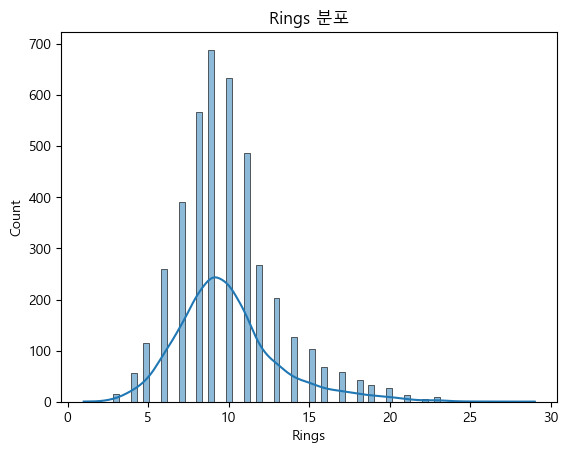

Epoch 1/20


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 85.1551 - val_loss: 29.5708
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7559 - val_loss: 12.1402
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5371 - val_loss: 6.6437
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6280 - val_loss: 5.8685
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9417 - val_loss: 5.7474
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5897 - val_loss: 5.5625
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0235 - val_loss: 5.3952
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7592 - val_loss: 5.4336
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1206 - val_loss: 5.3917
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0685 - val_loss: 5.1072
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3550 - val_loss: 5.2865
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3419 - val_loss: 5.0

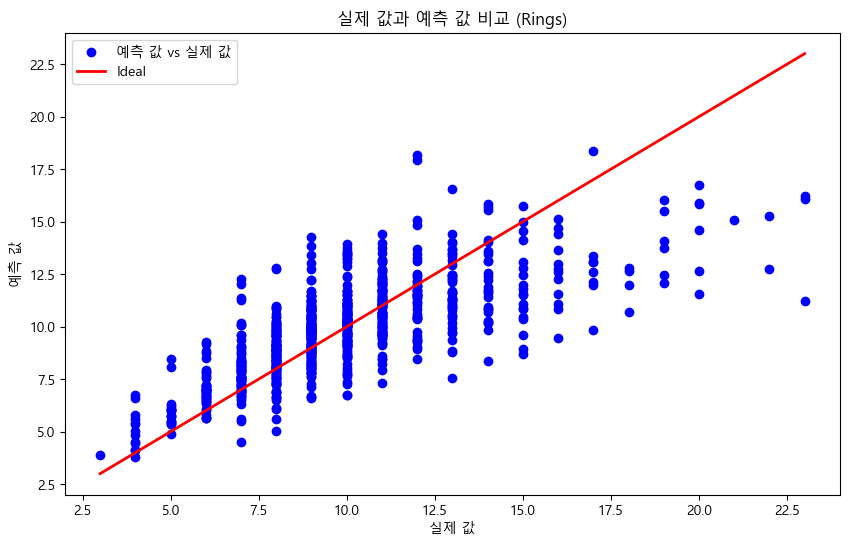

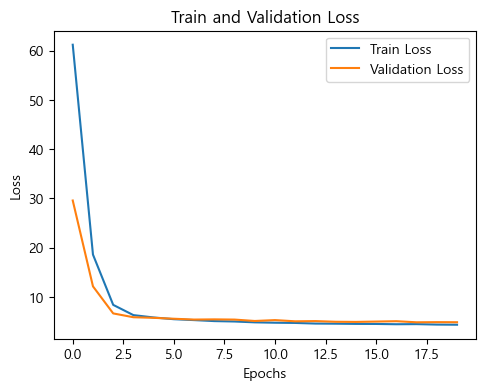

In [5]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/abalone.csv'
data = pd.read_csv(url)

# 1. EDA (탐색적 데이터 분석)
# 데이터 요약
print(data.info())
print(data.describe())

# 결측치 확인
print("결측치 개수:\n", data.isnull().sum())

# 데이터 분포 시각화 (Rings 값의 분포)
sns.histplot(data['Rings'], kde=True)
plt.title('Rings 분포')
plt.show()

# 'Sex' 열을 One-hot 인코딩
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# 2. 데이터 전처리
# X는 'Rings'를 제외한 나머지 특성, y는 예측할 레이블 'Rings'
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 신경망 회귀 모델 구성
# Sequential API를 사용하여 Dense Layer 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 출력 노드는 1개 (회귀 문제이므로 활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 4. 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"신경망 회귀 모델 성능 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 5. 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='예측 값 vs 실제 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.title('실제 값과 예측 값 비교 (Rings)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()

# 6. 학습 곡선 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
